<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/Solucion_8_1_1_PRACTICE_Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Linear Regression

## Black Friday Sales Prediction:

We are going to use a dataset of product purchases during a Black Friday (in the US). The main idea is to be able to generate a predictor that allows us to predict the `purchase amount`.

In order to achieve a good predictor we must apply the different concepts that we have been learning:

* `Exploration`
* `Feature Engineering`
* `Modeling`
* `Evaluation`

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer `purchase` behaviour against different products. The problem is a `regression problem` where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

### You can try differents Scikit-Learn models from [Linear Models](https://scikit-learn.org/1.5/modules/linear_model.html)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!gdown "1HZ_nk9Q0xp-qbAtXZvDxK5VNVfavt7ph"

data = pd.read_csv("BlackFriday.csv")
data.sample(5)

Downloading...
From: https://drive.google.com/uc?id=1HZ_nk9Q0xp-qbAtXZvDxK5VNVfavt7ph
To: /content/BlackFriday.csv
100% 25.0M/25.0M [00:02<00:00, 11.2MB/s]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
210445,1002444,P00157142,F,46-50,4,B,1,1,11,16.0,NaN,6055
14132,1002100,P00230942,F,26-35,0,C,4+,0,5,14.0,NaN,6947
72332,1005109,P00084242,F,46-50,6,C,2,1,8,14.0,NaN,5886
412720,1003539,P00336542,F,26-35,4,A,1,1,12,NaN,NaN,1719
150843,1005312,P00001142,M,26-35,1,A,1,0,5,8.0,14.0,5364


In [4]:
data.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
print(data.isnull().sum())
print(data.isnull().mean() * 100)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64


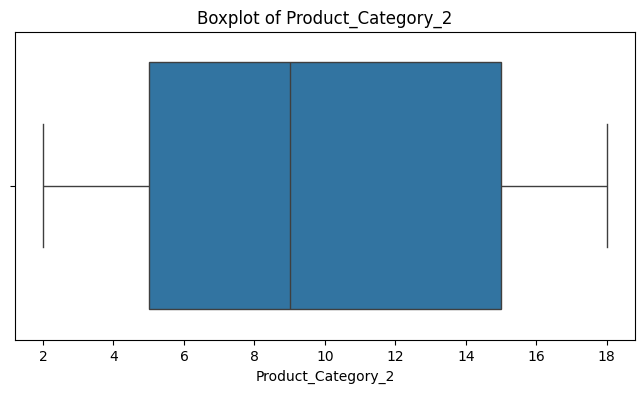

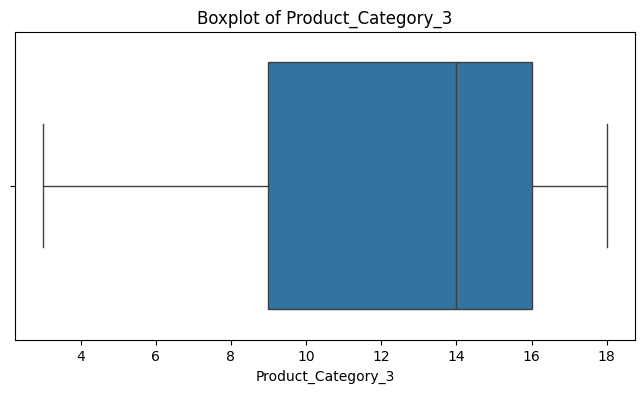

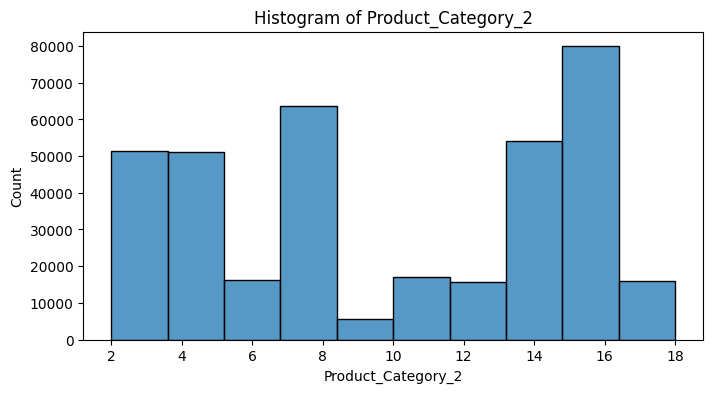

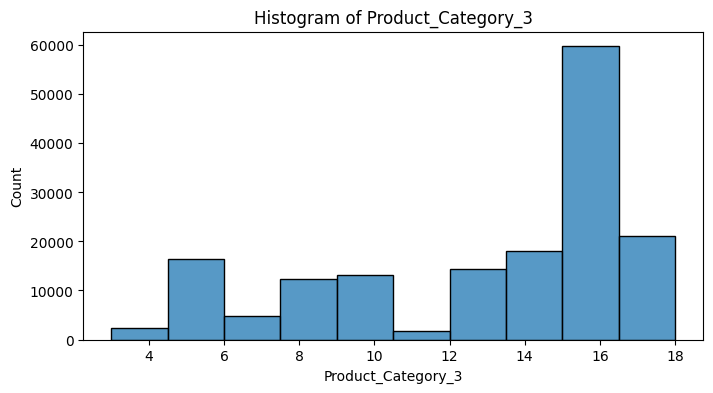

In [6]:
# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=data["Product_Category_2"])
plt.title("Boxplot of Product_Category_2")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=data["Product_Category_3"])
plt.title("Boxplot of Product_Category_3")
plt.show()

# Optional: Histogram
plt.figure(figsize=(8,4))
sns.histplot(data["Product_Category_2"], bins=10, kde=False)
plt.title("Histogram of Product_Category_2")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data["Product_Category_3"], bins=10, kde=False)
plt.title("Histogram of Product_Category_3")
plt.show()

In [7]:
print(data.Product_Category_2.mean())
print(data.Product_Category_2.median())
print(data.Product_Category_3.mean())
print(data.Product_Category_3.median())
median_2=data.Product_Category_2.median()
data.Product_Category_2.fillna(median_2, inplace=True)
data.drop("Product_Category_3", axis=1, inplace=True)
print(data.isnull().sum())

9.842144034798471
9.0
12.669840149015693
14.0
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64


/tmp/ipython-input-735965605.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Product_Category_2.fillna(median_2, inplace=True)


In [8]:
print(data.duplicated().sum())

0


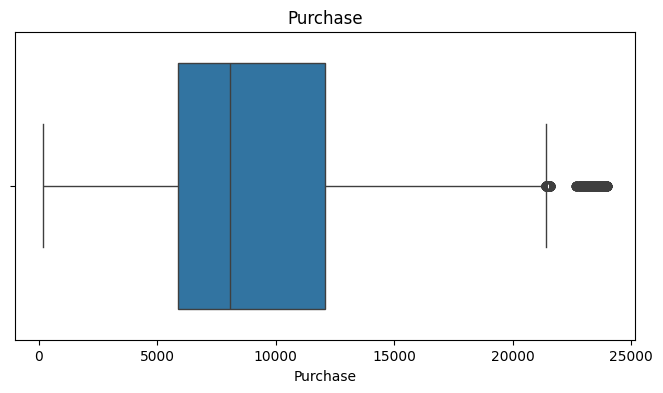

In [9]:
# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=data["Purchase"])
plt.title("Purchase")
plt.show()